# MAchine Learning Approch- SVM for classification on IRIS dataset

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [13]:
data = load_iris()

In [32]:
data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [19]:
df = pd.DataFrame(data= data.data, columns= data.feature_names)

In [20]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
df.describe()
# try to understand it

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [25]:
# Try to understand data hre, we have 150entries, 4 columns, their names are displayed,
#data types are given

In [26]:
# Here we have 4 columns as input attribute and one target column with 3 classes
# All columns have numerical values and dont have any null values, so no need of encoding 
# We have all values in the same range no need of data scalling

In [27]:
y = pd.DataFrame(data= data.target, columns=['target'])

In [28]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [30]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
target    150 non-null int64
dtypes: int64(1)
memory usage: 1.2 KB


In [34]:
#to find corrlation add target to original data frame.
# 

df['target'] = y

In [35]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
#lets check correlation 
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


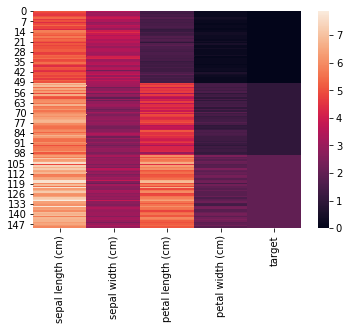

In [50]:
#also check a heatmap

import seaborn as sns

sns.heatmap(df)

# Lets  go ahead with the data spitting 

In [53]:
from sklearn.model_selection import train_test_split
x = df.iloc[:, :4]



In [54]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [55]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [56]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2)

In [57]:
xtrain.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
71,6.1,2.8,4.0,1.3
89,5.5,2.5,4.0,1.3
67,5.8,2.7,4.1,1.0
31,5.4,3.4,1.5,0.4
102,7.1,3.0,5.9,2.1


In [59]:
print("xtrain size: ", xtrain.shape)
print("sxtest size: ", xtest.shape)
print("ytrain size: ", ytrain.shape)
print("yxtest size: ", ytest.shape)

xtrain size:  (120, 4)
sxtest size:  (30, 4)
ytrain size:  (120, 1)
yxtest size:  (30, 1)


In [60]:
# craete and train your model

from sklearn import svm
model = svm.SVC()
model.fit(xtrain,ytrain)


/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/speed/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [63]:
# lets predict the test data
pred = model.predict(xtest)

In [64]:
pred

array([0, 2, 0, 2, 2, 0, 2, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 0, 2])

In [74]:
model.score(xtest,pred)

1.0

In [76]:
# we have checked it on all data 
model.predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [79]:
# lets check all other metrics too
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc = accuracy_score(ytest, pred)
cm = confusion_matrix(ytest, pred)
cr = classification_report(ytest, pred)

In [80]:
print("Accuracy=\n", acc)
print("Confusion Matrix=\n", cm)
print("Classification Report=\n", cr)

Accuracy=
 0.9333333333333333
Confusion Matrix=
 [[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]
Classification Report=
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

